<img src="https://github.com/sunilayyaps/datascience/blob/master/capstone-project2/ipl/images/vivo-ipl-2018.jpg?raw=true">

# Indian Premier League - Introduction
IPL competition is played amongst 8 elite clubs. The format of the game is very simple – each team will face the other 7 teams twice once in their home ground and then in other team’s ground. At the end of all the 56 matches, the top four will qualify for the playoff. The first two ranked team will play against each other in Qualifier 1 and the third and fourth team will play against each other in Qualifier 2. The winner of Qualifier 1 one will be qualified for the final and the loser will play against the winner of Qualifier 2 in the Eliminator. 

Group games do not necessarily end with one side winning. They can either have ‘no result’ if weather prevents the game from being finished or be ‘Super-over if both teams end on the same score. In the knock out rounds, ‘no result’ games are replayed on a reserve day and ‘tied’ matches are decided by ‘super-over, ensuring that there is always a winner.

In each IPL team, a total of 11 players will play the match and it must comprise of 7 Indians and 4 foreign players. The rule of 7 Indians is mandatory and was introduced to promote local players. So one of the challenges all the team faces in each match is to select the 4 foreign players from a total of 8 players. 

**I am trying to solve three problems **

**1. Predict the outcome**
To predict the result of a T-20 IPL match based on various parameters such Home advantage, First Bat, Ground conditions, Toss, Team combinations. 

**2. To assist the coach & captain in team selection** 
Who should be included on each grounds against each opposition? Who is probably going to perform better? 

**3. Fantasy League Prediction**
What should be the composition of your fantasy league team? Fantasy league team is a visual game played by the cricket fans. In a day, the fans are allowed to pick their playing 11 from the four teams who play on a day. 


### Steps for predicting the outcome
1. We will clean our dataset
2. Split it into training and testing data (12 features & 1 target (winning team (Home/Away/Tie))
3. Train 3 different classifiers on the data -Logistic Regression -Support Vector Machine -XGBoost
4. Use the best Classifer to predict who will win given an away team and a home team




In [2]:
%%html
<style>
table {float:left}
</style>

## Previous IPL Winners


|YEAR | WINNERS | RUNNERS-UP | 
|-- | -- | -- |
|2008 | Rajasthan Royals | Chennai Super Kings | 
|2009 | Deccan Chargers | Royal Challengers Bangalore | 
|2010 | Chennai Super Kings | Mumbai Indians | 
|2011 | Chennai Super Kings | Royal Challengers Bangalore | 
|2012 | Kolkata Knight Riders | Chennai Super Kings | 
|2013 | Mumbai Indians | Chennai Super Kings | 
|2014 | Kolkata Knight Riders | Kings XI Punjab |
|2015 | Mumbai Indians | Chennai Super Kings | 
|2016 | Sunrisers Hyderabad | Royal Challengers Bangalore
|2017 | Mumbai Indians | Pune Supergiants   


## Some Data Points to Consider
- In 2008 IPL started with 8 teams - Chennai Super Kings, Rajasthan Royals, Kolkata Knight Riders, Mumbai Indians, Kings XI, Deccan Chargers, Royal Challengers, Delhi DareDevils
- In 2011 - Two more teams were introduced - Pune Warriors and Kochi Tuskers. But after 2013, both these teams were terminated for breaching its terms of agreement.
- In 2013 - Deccan chargers were sold & renamed as Sunrisers Hyderabad.
- In 2016 - Two popular teams who were previous champions Chennai Super Kings and Rajasthan Royals was suspended for two years. Just to keep up with the number of matches two new teams Pune Supergiants and Gujarat Lions took their place and played 2016 and 2017 season
- In 2018 - Both the suspended teams are returning replacing the Pune Supergiants and Gujarat Lions
- In our datasets, you will be seeing this inconsistency in the team accross the season. This is not a data issue but because of all the events happened. 

<div class="span10 alert alert-danger">
<b>Important Note</b>
</div>  

<div class="span10 alert alert-warning">
<b>Warning Note</b>
</div>  

<div class="span10 alert alert-info">
<b>Info</b>
</div> 


<div class="span25 alert alert-danger">

<b> For easy reading all teams will be referred by their ABBR in notes but will be referred with full names in charts </b>  
<br>
- Rajasthan Royals - RR  <br>
- Chennai Super Kings - CSK  <br>
- Mumbai Indians - MI  <br>
- Royal Challengers Bangalore - RCB <br>
- Sunrisers Hyderabad - SRH <br>
- Kolkata Knight Riders - KKR   <br>
- Kings XI Punjab - KXI    <br>
- Delhi Daredevils - DD    <br>
- Rising Pune Supergiants - RPS    <br>
- Gujarat Lions - GL    <br>
- Pune Warriors - PW  <br>
- Kochi Tuskers Kerala - KTK    <br>
</div>

## Datasets
<div class="span25 alert alert-danger"> <br>
My thanks and credit to <b>Gaurav Chauhan </b>and <b>NDTV sports</b> for the datasets.  
</div>

**1. ipl_all_season_matches.csv**  
All the matches played from 2008-2017  (https://www.kaggle.com/gaurav896/ipl-analysis/data)  
**2. ipl_all_season_ball_by_ball.csv**   
All the ball-by-ball scorecard from 2008 - 2017 (https://www.kaggle.com/gaurav896/ipl-analysis/data)  
**3. ipl_2018_auction.xls**  
Scraped the auction information from ndtv sports  
https://sports.ndtv.com/indian-premier-league-2018/auction


<div class="span25 alert alert-warning">
<b>References</b>  
<br> <b><a href = "https://pdfs.semanticscholar.org/4667/1ddcbb7bcee189ede56937c440b2ec4d0147.pdf"> Autoplay : A Data mining approach to ODI cricket simulation and prediction</a> </b><br> 

<b> <a href = "http://ijcst.com/vol54/Spl1/11-Vikas-Kumar.pdf"> Evaluation of a Batsman’s Performance in Cricket Using Fuzzy Logic </a></b> <br>
  <br>

<b><a href = "https://arxiv.org/pdf/1511.05837.pdf"> Using Machine Learning to Predict the Outcome of English County twenty over Cricket Matches </a></b>  <br>
  <br>
</div>



## Data Cleaning
We will start with checking what kind of data we have and if needed clean and wrangle them,


## Common Problems Found in this Dataset
- Inconsistent column names
- Missing Data
- Outliners
- Duplicate rows
- Untidy
- Need to process columns
- Column type signal unexpected data values
- Teams changing names such as Rising Supergiant was changed to Rising Supergiants



In [139]:
#Declaring all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.stats as stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.stats.api as sms
from scipy import stats as st
import pandas.tseries
#To scale our features as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
sns.set()


Loading BokehJS ...

In [8]:
#reading all matches csv and assigning it to dataframe
df_all_matches = pd.read_csv('data/ipl_all_season_matches.csv',header = 0)
#checking whether all season are there
print(df_all_matches.season.unique())

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]


<div class="span25 alert alert-info">
Looks like our datasets contains all seasons played so far
</div>

In [7]:
#Taking a count of matches in each season
df_all_matches.groupby(['season']).size()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
dtype: int64

<div class="span25 alert alert-info">
In each season the numbers of matches played are of different count. This is because some of the matches might be cancelled out due to rain.From 2011-2013, there were more matches played because of introduction of two new teams. However after 2013, the total team got reduced to 8.
</div>

In [109]:
# Total number of matches won by each team 
df_all_matches_winners = df_all_matches.groupby(['winner']).size().reset_index(name='count')
df_all_matches_winners_sorted = df_all_matches_winners.sort_values(by='count', ascending=False)
print(df_all_matches_winners_sorted)

                         winner  count
7                Mumbai Indians     92
0           Chennai Super Kings     79
6         Kolkata Knight Riders     77
11  Royal Challengers Bangalore     73
4               Kings XI Punjab     70
9              Rajasthan Royals     63
2              Delhi Daredevils     62
12          Sunrisers Hyderabad     42
1               Deccan Chargers     29
10      Rising Pune Supergiants     15
3                 Gujarat Lions     13
8                 Pune Warriors     12
5          Kochi Tuskers Kerala      6


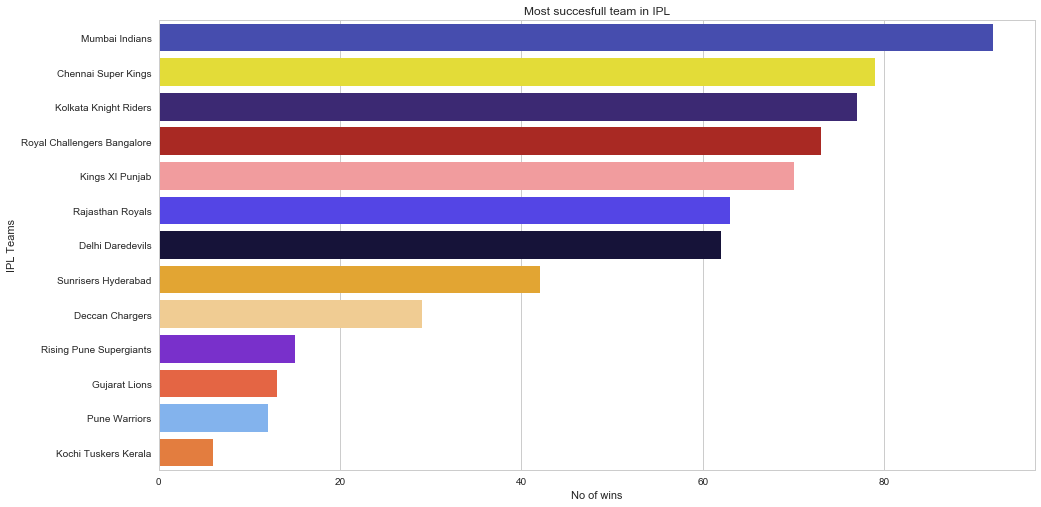

In [130]:
# Data visualization of the sucessful team in IPL

colors = ['#353EBF','#FFF61B','#361D7F','#BF150D','#FF8E90','#3E2BFF','#110C40','#FFAE16','#FFD083','#7716E5','#FF5529','#71B2FF','#FF7623']
team = df_all_matches_winners_sorted['winner']
win_count = df_all_matches_winners_sorted['count']
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
sns.set_style("whitegrid")
ax = sns.barplot(x=win_count, y=team, data=df_all_matches_winners,palette=colors);
ax.set(xlabel='No of wins', ylabel='IPL Teams',title = 'Most succesfull team in IPL',)
plt.show()

<div class="span25 alert alert-info">
<b>Used the team colors for the chart.</b>
MI seems to be the most succesful team in all of the IPL seasons with 92 wins in 10 seasons followed by CSK with 79 wins in 8 seasons and KKR with 77 in 10 seasons
</div>

In [138]:
df_all_matches_venues = df_all_matches.groupby(['city']).size().reset_index(name='count')
print(df_all_matches_venues.sort_values(by='count', ascending=False).head(8))

          city  count
21      Mumbai     85
2    Bangalore     66
20     Kolkata     61
9        Delhi     60
13   Hyderabad     49
7      Chennai     48
6   Chandigarh     46
15      Jaipur     33


<div class="span25 alert alert-warning">
For IPL 2018, we just need to consider top 8 grounds from the above list. Rest of the grounds can be ignored as some of them were used when IPL was played in South Africa, Dubai and Sharjah. Also when PW, RPS, GL and KTK were playing few new grounds were introduced as their home grounds. Since they are not playing in IPL 2018, we don't need to consider those grounds.
</div>